# MLE with Normal distribution

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
sns.set_context('notebook')

%matplotlib inline

## Draw normal density

$$f\left(y_{i};\mu,\sigma\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{\left(y_{i}-\mu\right)^{2}}{2\sigma^{2}}\right)$$

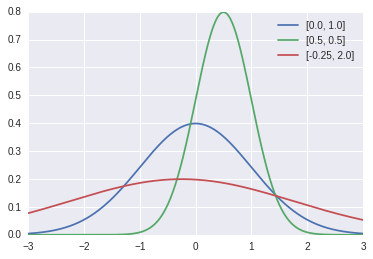

In [2]:
theta = [[0., 1.], [.5, .5], [-.25, 2.]]

f = lambda x, mu, sigma: 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(- .5 * (x - mu) ** 2 / sigma ** 2) 

y = np.linspace(-3, 3, 1e3)
for t in theta:
    mu, sigma = t[0], t[1]
    ff = [f(x, mu, sigma) for x in y]
    plt.plot(y, ff)

plt.legend(theta)
plt.show()

## Simulate data and draw histogram

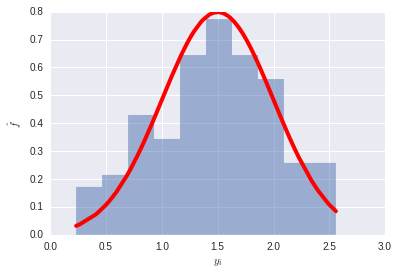

In [3]:
n = int(1e2)
mu, sigma = 1.5, .5
# simulate data
y = np.sort(np.random.normal(mu, sigma, n))

# plot data
plt.hist(y, bins=10, normed=True, histtype='stepfilled', alpha=.5, lw=0)
plt.plot(y, f(y, mu, sigma), c = 'red', lw = 4)
plt.xlabel('$y_i$')
plt.ylabel('$\hat{f}$')
plt.show()

## Simulate data and estimate model parameter by MLE

MLE estimator is

$$\begin{eqnarray*}
\hat{\mu} & = & \frac{1}{n}\sum_{i=1}^{n}y_{i},\\
\hat{\sigma}^{2} & = & \frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{\mu}\right)^{2}.
\end{eqnarray*}$$

Estimates are: mu =  1.43266333763  sigma =  0.45243449549


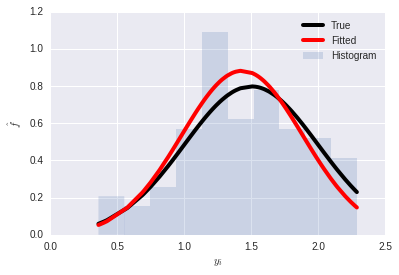

In [4]:
# sample size
n = int(1e2)
# true parameter value
mu, sigma = 1.5, .5
# simulate data
y = np.sort(np.random.normal(mu, sigma, n))
# MLE estimator
mu_hat = np.mean(y)
sigma_hat = np.sqrt( np.mean( (y - mu_hat) ** 2 ) )
print('Estimates are: mu = ', mu_hat, ' sigma = ', sigma_hat)
# function of exponential density
ff = lambda y, mu, sigma: [f(x, mu, sigma) for x in y]

# plot results
plt.hist(y, bins=10, normed=True, alpha=.2, lw=0)
plt.plot(y, ff(y, mu, sigma), c='black', lw=4)
plt.plot(y, ff(y, mu_hat, sigma_hat), c='red', lw=4)
plt.xlabel('$y_i$')
plt.ylabel('$\hat{f}$')
plt.legend(('True', 'Fitted','Histogram'))
plt.show()